<a href="https://colab.research.google.com/github/malinphy/IMDB_Analysis_different_approachs/blob/main/IMDB_ML_VS_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import os 
import re 
from collections import Counter 


In [2]:
data_dir =r'https://raw.githubusercontent.com/malinphy/IMDB_Analysis_different_approachs/main/IMDB_Dataset_short2.csv'

data = pd.read_csv(data_dir)

data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18999 entries, 0 to 18998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     18999 non-null  object
 1   sentiment  18999 non-null  object
dtypes: object(2)
memory usage: 297.0+ KB


In [4]:
data.head(1)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive


In [5]:
data_reviews = data['review'].copy()

In [6]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [7]:
pos,neg= data.groupby('sentiment')['review'].nunique()[0],data.groupby('sentiment')['review'].nunique()[1]
pols = pos, neg

pols_name =  ['pos', ' neg'] 

pols_name

['pos', ' neg']

Text(0.5, 1.0, 'Distribution of Sentiments')

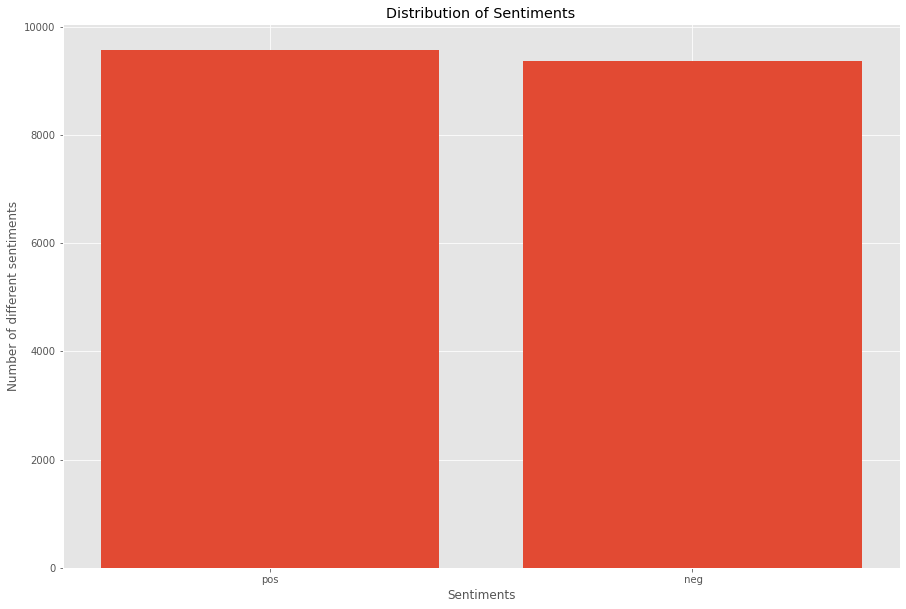

In [8]:
plt.figure(figsize=(15,10))
plt.style.use('ggplot')
plt.bar(pols_name,   pols,
               # color=["rgb(254, 217,166)", "goldenrod"],
               # template  ="plotly_dark",
               # labels=["bara","bir"], 
               # width = 550 , 
               # height = 500
               )
#my_fig.update_layout(legends=(["bara","bir"]))
plt.xlabel("Sentiments")
plt.ylabel("Number of different sentiments")
plt.title("Distribution of Sentiments")

In [9]:
## cleaning the punctuation marks 

def text_cleaner(X):

  X[i] = re.sub("<br /><br />|,|\?|\(|\)|\"|!|:|@|#|&|\+"," ",X[i])
  X[i] = re.sub("-|_|\."," ",X[i])
  #X[i] = data_reviews[i].lower()
  X[i] = re.sub("1|2|3|4|5|6|7|8|9|0","",X[i])
  X[i] = re.sub("  "," ",X[i])
  X[i] = re.sub("   "," ",X[i])

  return X

In [10]:
#calculation of total number of the words in each review

def ReviewLen (X):
    empty_counter = []

    for i in range(len(X)):

        empty_counter.append(len(X[i].split()))
        
    return empty_counter

In [11]:


def word_counter(x):
    
    splitter = []
    for i in x:
        var1 = i.split()
        for j in var1:
            splitter.append(j)
            
    word_number_count = Counter(splitter).most_common()
    
    words = []
    words_number = []
    
    for i in word_number_count:
        words.append(i[0])
        words_number.append(i[1])
    
    
    words = words[0:50]
    words_number = words_number[0:50]
    
    total_words = (np.array(word_number_count)[:,1]).astype('int64')
    totalNumberOfWords=np.sum(total_words)
    
    return words,words_number, totalNumberOfWords



In [12]:


mostCommonWords, wordDensity, totalNumber = word_counter(data_reviews)




<function matplotlib.pyplot.show>

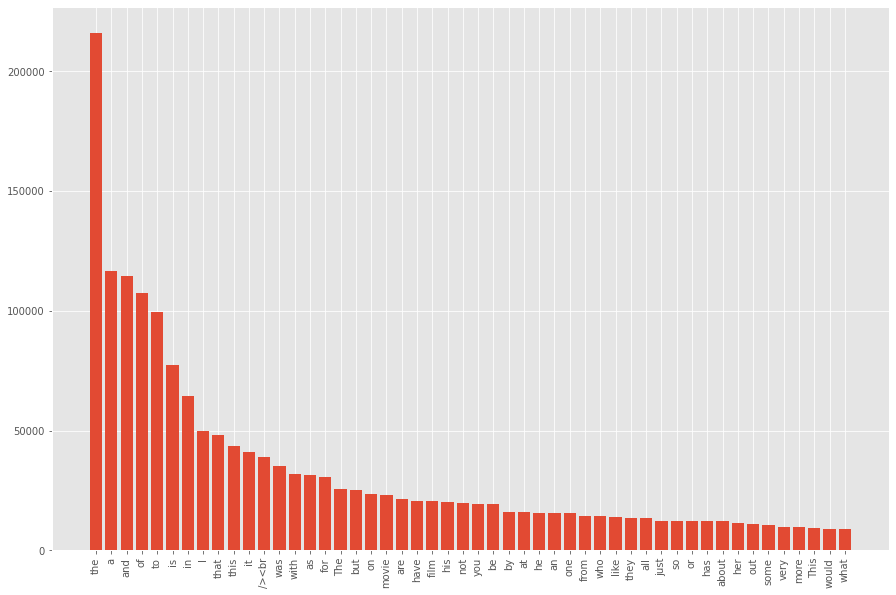

In [13]:
plt.figure(figsize=(15,10))
plt.bar(mostCommonWords,wordDensity)
plt.xticks(rotation=90)
plt.show

In [14]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
## stripping the stopwords from text data
def stopwords_cleaner (X):
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  clean_data_reviews = []
  for k in X:
    k = pattern.sub("",k)
    clean_data_reviews.append(k)

  return clean_data_reviews

In [16]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [17]:
data_reviews[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

stem_cell = []
for i in range(len(data_reviews)):
  x = data_reviews[i].split()

  for j in range(len(x)):
     x[j] = stemmer.stem(x[j])

In [18]:
deneme_cumle = [
                'One of the other reviewers has mentioned that after watching just 1 Oz episode you are hooked.',
                'This show pulls no punches with regards to drugs, sex or violence.'
                ]



In [19]:
empty_cycle = [] 
for i in deneme_cumle:
  x = ((i.lower().split()) )
  print(len(x))
  for i in x:
    empty_cycle.append(stemmer.stem(i))

17
12


In [20]:
len(empty_cycle)

29

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

reviews_vector = vectorizer.fit_transform(data_reviews)
#vectorizer.get_feature_names()

In [22]:
#vectorizer for the sentiment values

sentiment_scores = data['sentiment'].copy()


sentiment_vectorizer = CountVectorizer().fit_transform(sentiment_scores)
sentiment_vector=sentiment_vectorizer.toarray()

In [23]:
sentiment_vector_1D = np.zeros(len(sentiment_vector))


for i in range(len(sentiment_vector)):
    sentiment_vector_1D[i] = sentiment_vector[i][0]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
reviews_train, reviews_test , sentiment_train, sentiment_test = train_test_split(
                                                                reviews_vector, sentiment_vector_1D,
                                                                train_size = 0.8 , random_state=42)

In [26]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 68164), (3800, 68164), (15199,), (3800,))

$\textbf{Logistic Regression classifier}$

In [27]:

from sklearn.linear_model import LogisticRegression

LG = LogisticRegression()

LG.fit(reviews_train,sentiment_train)

sentiment_predict_score_LG=LG.predict(reviews_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [28]:
reviews_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [30]:
sentiment_predict_score_LG

array([0., 1., 0., ..., 0., 1., 0.])

In [31]:
sentiment_test

array([0., 1., 0., ..., 1., 0., 0.])

In [32]:
from sklearn.metrics import precision_recall_fscore_support

In [33]:
y_true_LG = sentiment_test 
y_pred_LG = sentiment_predict_score_LG

LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
confusion_matrix(y_true_LG, y_pred_LG)

array([[1676,  204],
       [ 239, 1681]])

In [34]:
import seaborn as sn

Text(0.5, 1.0, 'confusion matrix without normalization Logistic Regression')

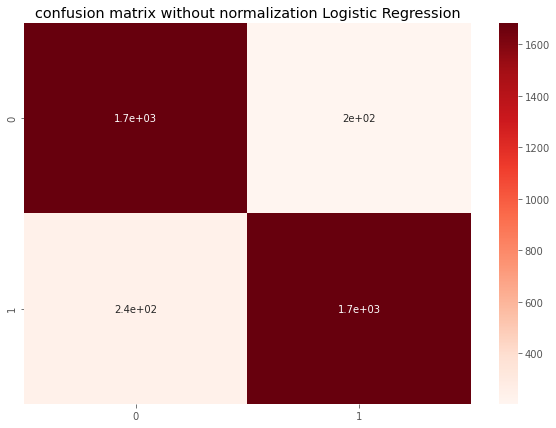

In [35]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_LG, y_pred_LG),annot=True,cmap=plt.cm.Reds)
plt.title('confusion matrix without normalization Logistic Regression')

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0)

In [37]:
DTC_fit=DTC.fit(reviews_train,sentiment_train)

In [38]:
sentiment_predict_score_DTC=DTC_fit.predict(reviews_test)

In [39]:
y_true_DTC = sentiment_test 
y_pred_DTC = sentiment_predict_score_DTC

DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
confusion_matrix(y_true_DTC, y_pred_DTC)

array([[1358,  522],
       [ 531, 1389]])

Text(0.5, 1.0, 'confusion matrix without normalization for Decision Tree')

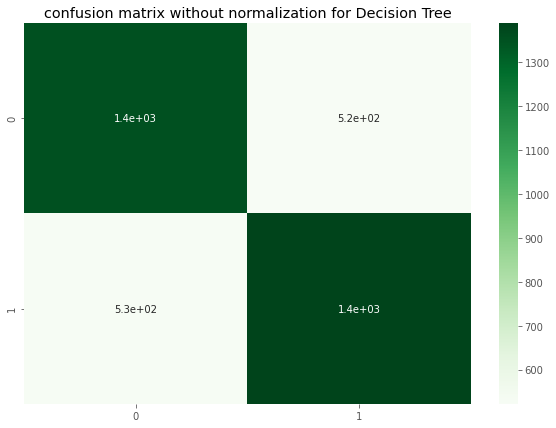

In [40]:
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(y_true_DTC, y_pred_DTC),annot=True,cmap=plt.cm.Greens)
plt.title('confusion matrix without normalization for Decision Tree')

$\textit{Random Forest Classifier}$

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RFC= RandomForestClassifier()
RFC_fit=RFC.fit(reviews_train,sentiment_train)
sentiment_predict_score_RFC=RFC_fit.predict(reviews_test)

y_true_RFC = sentiment_test 
y_pred_RFC = sentiment_predict_score_DTC

RF_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
confusion_matrix(y_true_RFC, y_pred_RFC)

array([[1358,  522],
       [ 531, 1389]])

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
def different_classifiers(X_train,y_train,X_test,y_test):

    #------ LOGISTIC REGRESSION
    
    LG = LogisticRegression()

    LG.fit(X_train,y_train)

    sentiment_predict_score_LG=LG.predict(X_test)
    
    y_true_LG = y_test 
    y_pred_LG = sentiment_predict_score_LG

    LG_metrics=precision_recall_fscore_support(y_true_LG,y_pred_LG,average=None)
    LG_confusion_matrix=confusion_matrix(y_true_LG, y_pred_LG)
    
    #------ LOGISTIC REGRESSION
    
    
    
    #------ RANDOM FOREST CLASSIFIER
    
    RFC= RandomForestClassifier()
    RFC_fit=RFC.fit(X_train,y_train)
    sentiment_predict_score_RFC=RFC_fit.predict(X_test)

    y_true_RFC = y_test  
    y_pred_RFC = sentiment_predict_score_RFC

    LG_metrics=precision_recall_fscore_support(y_true_RFC,y_pred_RFC,average=None)
    RFC_confusion_matrix = confusion_matrix(y_true_RFC, y_pred_RFC)
    
    #------ RANDOM FOREST CLASSIFIER
    
    
    #------ DECISION TREE CLASSIFIER
    
    DTC = DecisionTreeClassifier(random_state=0 )  
    DTC_fit = DTC.fit(X_train,y_train)
    sentiment_predict_score_DTC=DTC_fit.predict(X_test)
                                 
    y_true_DTC = y_test 
    y_pred_DTC = sentiment_predict_score_DTC

    DTC_metrics=precision_recall_fscore_support(y_true_DTC,y_pred_DTC,average=None)
    DTC_confusion_matrix = confusion_matrix(y_true_DTC, y_pred_DTC)
    
    #------ DECISION TREE CLASSIFIER
    
    
    return LG_confusion_matrix,RFC_confusion_matrix,DTC_confusion_matrix

In [45]:
Logistic_Reg, Random_For,Decision_Tree = different_classifiers(reviews_train,
                                                              sentiment_train,
                                                              reviews_test,
                                                              sentiment_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [46]:
print("Logistic Regression CM :\n",Logistic_Reg) , print("Random Forest CM:\n",Random_For), print("Decision Tree CM : \n", Decision_Tree)

Logistic Regression CM :
 [[1676  204]
 [ 239 1681]]
Random Forest CM:
 [[1619  261]
 [ 299 1621]]
Decision Tree CM : 
 [[1358  522]
 [ 531 1389]]


(None, None, None)

In [47]:
reviews_train.shape, reviews_test.shape, sentiment_train.shape, sentiment_test.shape

((15199, 68164), (3800, 68164), (15199,), (3800,))